In [41]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_json('recipes.json')
data.dropna(subset=['rating'], inplace=True, ignore_index=True)
print(data.dropna(how='any', inplace=False, ignore_index=True).shape)
data.info()
#directions, date, categories, rating, title, ingredients are always present
mandatory_columns = ['directions', 'date', 'categories', 'title', 'ingredients']
optional_columns = ['fat', 'calories', 'desc', 'protein', 'sodium']

(10608, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20100 non-null  object             
 1   fat          15901 non-null  float64            
 2   date         20100 non-null  datetime64[ns, UTC]
 3   categories   20100 non-null  object             
 4   calories     15969 non-null  float64            
 5   desc         13484 non-null  object             
 6   protein      15922 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20100 non-null  object             
 9   ingredients  20100 non-null  object             
 10  sodium       15967 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [3]:
data.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [4]:
data['rating'].unique()
# rating doesn't seem to be continuous

array([2.5  , 4.375, 3.75 , 5.   , 3.125, 1.875, 0.   , 1.25 ])

# 3 Basic Project
The basic project will consist of solving a regression task, comparing the performance obtained using different vectorizations of the documents and at least two different machine learning strategies, as described below. 

You should use the information in the directions and/or desc variables for all steps of the project, possibly combining this information with metadata from other variables. You should use appropriate metrics for evaluating this task. The performance of the different methods should be estimated using a validation methodology, which you should also explain in the documentation. You should provide a description of the methodology used and analyze the performance obtained according to the input variables.
Keep in mind that the goal is to describe the work carried out and critically analyze the results obtained. Support this with graphs or other representations you consider appropriate. There is no need to describe the algorithms used, but you should explain how you tuned their parameters.

## 3.1
Analysis of input variables. Visualize the relationship between the output variable and some categories in the categories variable and explain their potential relevance to the problem.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# we force the high dimensionality words to go lower dimensionality, by using the lower dimensionality vector d. this vector is the empedding in the end
# input is V then do VxD then do DxV so the output is V again, and in the middle the vektor is of size D

In [6]:
all_categories = data['categories'].explode().unique()
print(len(all_categories))

675


In [7]:
categories = {category: data['categories'].apply(lambda x: 1 if category in x else 0) for category in all_categories}
assert(len(categories) == len(all_categories))

In [8]:
categories_and_rating = pd.DataFrame(categories)
categories_and_rating['rating'] = data['rating']
categories_and_rating

,Sandwich,Bean,Fruit,Tomato,turkey,Vegetable,Kid-Friendly,Apple,Lentil,Lettuce,...,Quiche,Anthony Bourdain,Marinade,Pacific Palisades,Alaska,Mississippi,Crêpe,New Hampshire,Sourdough,rating
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2.500
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.375
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.750
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.125
20096,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.375
20097,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.375
20098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.375


In [9]:
categories = pd.get_dummies(data['categories'].apply(pd.Series).stack()).groupby(level=0).max()
categories_and_rating = pd.concat([categories, data['rating']], axis=1)
categories_and_rating

,#CAKEWEEK,#WasteLess,22-Minute Meals,3-Ingredient Recipes,30 Days of Groceries,Advance Prep Required,Alabama,Alaska,Alcoholic,Almond,...,Yogurt,Yonkers,Yuca,Zucchini,cookbooks,leftovers,snack,snack week,turkey,rating
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2.500
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.375
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.750
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5.000
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500
17066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000
17971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
18649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [10]:
grouped_by_rating = categories_and_rating.groupby(['rating'])
normalizer = grouped_by_rating.size() / len(categories_and_rating)
assert(abs(normalizer.sum() - 1)  < 0.001)
normalizer

rating
0.000    0.091990
1.250    0.008159
1.875    0.006169
2.500    0.026667
3.125    0.074080
3.750    0.257413
4.375    0.399652
5.000    0.135871
dtype: float64

In [11]:
normalize_column = lambda x: x / normalizer / (x / normalizer).sum()
relations = grouped_by_rating.sum().apply(normalize_column)
relations = relations.astype(float)
relations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0.0 to 5.0
Columns: 674 entries, #CAKEWEEK to turkey
dtypes: float64(674)
memory usage: 42.2 KB


<Axes: ylabel='rating'>

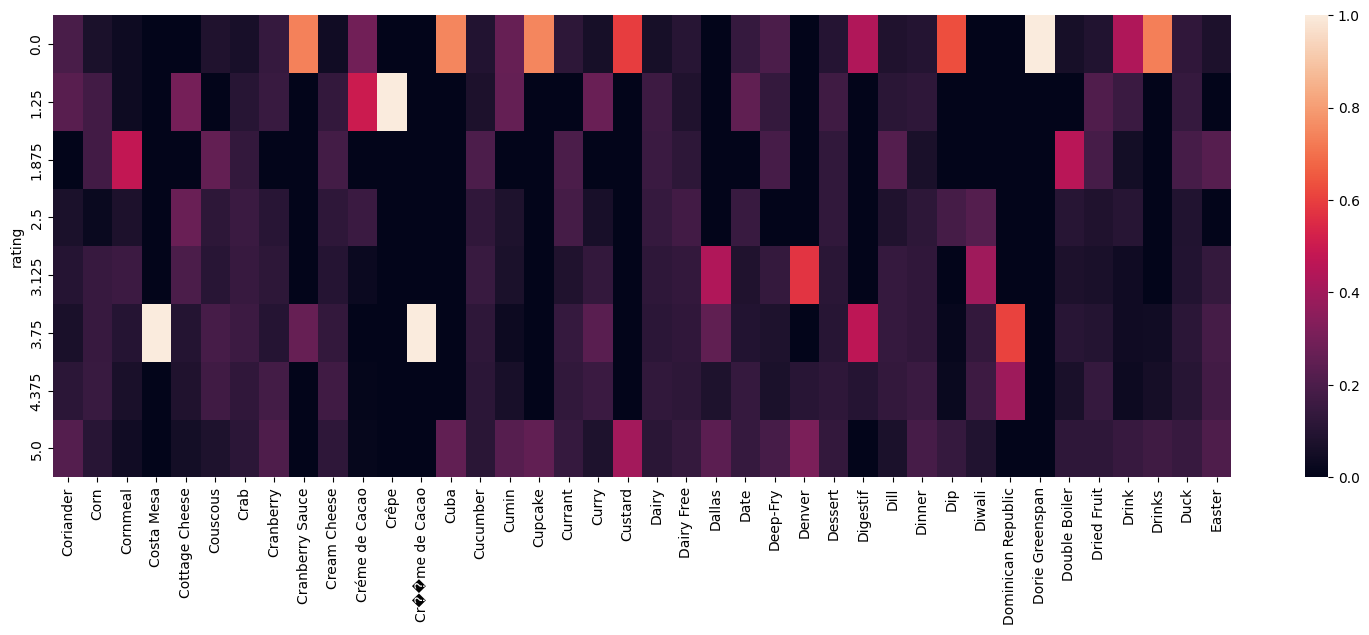

In [12]:
plt.figure(figsize=(19, 6))
# To get the boundaries of the plot, I just looked at the plot without the boundaries and searched for interesting looking areas
sns.heatmap(relations.iloc[:,150:190])
# From this plot for example one can get some interesting insights
# For example, the category 'Australia' seems to have good ratings
# While categories like 'Lime Juice', 'Bitters', 'Alcoholic' or 'Cocktail' seem to have bad ratings
# Other categories like 'Lemon' or 'Vinegar' seem to have no big impact on the rating

Alaska
False    20050
True         2
dtype: int64

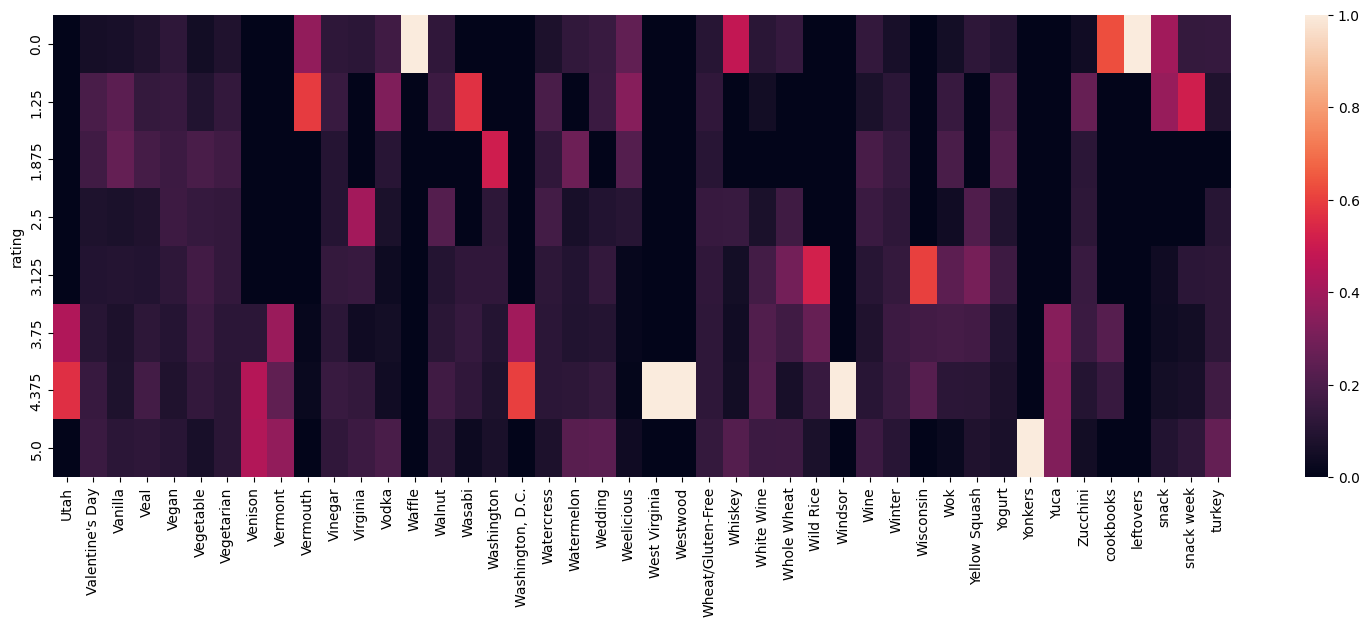

In [13]:
plt.figure(figsize=(19, 6))
sns.heatmap(relations.iloc[:,630:])
# This plot show some very significant relations, for example for 'Alaska'
# All recipes with 'Alaska' in the category seem to have a rating of 3.75
# But one needs to be careful with such conclusions, as the number of recipes with 'Alaska' is very low (2 of 20111)
categories_and_rating.groupby(['Alaska']).size()

## 3.2
Implementation of a pipeline for text preprocessing. For this task, you may use common libraries (NLTK, Gensim, or SpaCy), or any other library you deem appropriate. Keep in mind that when working with transformers, the text is passed without preprocessing.

In [14]:
data['desc'] = data['desc'].fillna('')
assert(data['desc'].isna().sum() == 0)

data['directions'] = data['directions'].apply(lambda x: ' '.join(x))
assert(data['directions'].isna().sum() == 0)

## 3.3
Vector representation of the documents using three different procedures:

### TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# nltk.download('stopwords')

In [16]:
def get_tfidf_matrix(data, column):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(data[column])

    return pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [17]:
directions_tfidf = get_tfidf_matrix(data, 'directions')
print(directions_tfidf.shape)
directions_tfidf.head()

(20100, 10188)


,0378,0383,04,05,0512,06,07,08,0852,10,...,árbol,ème,ère,éclair,éclairs,ée,épices,ñame,ﬁrst,ﬂattening
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
desc_tfidf = get_tfidf_matrix(data, 'desc')
print(desc_tfidf.shape)
desc_tfidf.head()

(20100, 15929)


,00,000,0175,0340,0820,10,100,100911,100959,100982,...,élysées,épice,épices,épuisette,érable,étouffée,übercrunch,übertrendy,この味は驚くばかりである,ﬂaked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Word2Vec (i.e., representing the documents as the average of the embeddings of the words that make them up)

In [19]:
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action='ignore')

#nltk.download('punkt_tab')

In [67]:
def get_word2vec_for_cell(text):
	all_words = []

	for sentence in sent_tokenize(text):
		words = []
		for word in word_tokenize(sentence):
			words.append(word.lower())

		all_words.append(words)

	model = Word2Vec(all_words, min_count=1, vector_size=100, window=5)

	return model.wv

def get_avrg_word2vec(text):
	if(text.strip() == ''):
		return pd.NA

	word_vectors = get_word2vec_for_cell(text)

	return np.mean(word_vectors.vectors, axis=0)

def get_word2vec_for_column(data, column):
	word2vec = data[column].apply(get_avrg_word2vec)

	return pd.DataFrame(word2vec)

In [69]:
directions_w2v = get_word2vec_for_column(data, 'directions')
print(directions_w2v.shape)
directions_w2v.head()

(20100, 1)


,directions
0,"[0.0001199181, 0.00065399223, -0.0002516664, -..."
1,"[-3.8732447e-05, 0.00014941755, -5.44992e-05, ..."
2,"[2.6965094e-05, 2.5520958e-05, -0.00045498624,..."
3,"[0.00013093937, 0.00070661533, -4.9503615e-05,..."
4,"[0.00029114884, 0.00016529768, 7.635097e-05, 0..."


In [73]:
desc_w2v = get_word2vec_for_column(data, 'desc')
print(desc_w2v.shape)
desc_w2v.head()

(20100, 1)


,desc
0,<NA>
1,"[-0.00036124984, 0.0015130913, 0.00083024555, ..."
2,<NA>
3,"[-0.0012556937, 0.0019181826, 0.001181246, 0.0..."
4,<NA>


In [48]:
model1.wv.vectors

array([[-5.3622725e-04,  2.3643136e-04,  5.1033497e-03, ...,
        -7.0415605e-03,  9.0145587e-04,  6.3925339e-03],
       [-8.6217495e-03,  3.6682470e-03,  5.1904046e-03, ...,
        -2.3919148e-03, -9.5106298e-03,  4.5068478e-03],
       [ 9.4348972e-05,  3.0779773e-03, -6.8124738e-03, ...,
         5.1311019e-04,  8.2130553e-03, -7.0179286e-03],
       ...,
       [ 1.7992688e-03,  7.0475684e-03,  2.9449610e-03, ...,
        -1.8595343e-03,  3.6116885e-03, -7.0356927e-03],
       [ 9.7345309e-03, -9.7804572e-03, -6.4998074e-03, ...,
        -2.7009314e-03,  3.8250417e-03,  3.3914373e-04],
       [ 5.6243762e-03,  5.4988144e-03,  1.8284366e-03, ...,
         7.3125223e-03,  5.4659606e-03,  9.2491070e-03]], dtype=float32)

### Contextual embeddings calculated from transformer-based models (e.g., BERT, RoBERTa, etc.)

In [2]:
from transformers import BertModel, BertTokenizer
import torch

/Users/benedikt.mehl/Library/CloudStorage/OneDrive-MaibornWolffGmbH/Privat/Studium/Master_V/DataProcessing/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [76]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

text = "Example of extracting embeddings with BERT"
input_ids = tokenizer.encode(text, return_tensors='pt')

In [77]:
input_ids

tensor([[  101,  2742,  1997, 14817,  2075,  7861,  8270,  4667,  2015,  2007,
         14324,   102]])

In [78]:
with torch.no_grad():
    outputs = model(input_ids)

last_hidden_states = outputs.last_hidden_state

In [80]:
last_hidden_states.shape

torch.Size([1, 12, 768])

## 3.4
Training and evaluation of regression models using at least the following two machine learning strategies:
- Neural networks using PyTorch for implementation.
- At least one other technique implemented in the Scikit-learn library
(e.g., K-NN, SVM, Random Forest, etc.)

### Neural networks using PyTorch for implementation.

In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    #x = x.to(device)
    #y = x.add(x)
    #y = y.to('cpu')
else:
    print('No GPU card is available')

No GPU card is available


### - At least one other technique implemented in the Scikit-learn library
(e.g., K-NN, SVM, Random Forest, etc.)

## 3.5
Comparison of the results obtained in step 3 with fine-tuning a pre-trained model from Hugging Face. In this step, you are asked to use a transformer model with a regression head.

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

# Load the pre-trained BERT tokenizer and classification model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize the input data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Dataset(train_encodings, train_labels)
test_dataset = Dataset(test_encodings, test_labels)

training_args = TrainingArguments(
    output_dir='./results', # Output directory
    num_train_epochs=3, # Number of epochs
    per_device_train_batch_size=16, # Training batch size
    per_device_eval_batch_size=64, # Evaluation batch size
    warmup_steps=500, # Warmup steps
    weight_decay=0.01, # Weight decay
    logging_dir='./logs', # Logging directory
    logging_steps=10,
)

trainer = Trainer(
    model=model, # Pre-trained model
    args=training_args, # Training arguments
    train_dataset=train_dataset, # Training data
    eval_dataset=test_dataset # Evaluation data
)

# Start fine-tuning
trainer.train()

# Evaluate the model
trainer.evaluate()

# Save the fine-tuned model
model.save_pretrained('./fine-tuned-bert')
tokenizer.save_pretrained('./fine-tuned-bert')